# Data Cleaning

this notebook contains data preprocessing techniques 

### Data Acquisition

Obtain 2013 snapshot data from [crunchbase.com](https://data.crunchbase.com/docs/2013-snapshot).

In [1]:
#code here

In [32]:
import pandas as pd
import numpy as np

In [88]:
#read obtained data
companies = pd.read_csv('data/crunchbase-companies.csv')
acquisitions = pd.read_csv('data/crunchbase-acquisitions.csv')
investments = pd.read_csv('data/crunchbase-investments.csv')
rounds = pd.read_csv('data/crunchbase-rounds.csv')

C:\Users\hp\ooo\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Cleaning and Exploring

In [3]:
companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at'],
      dtype='object')

In [4]:
companies.shape

(17727, 17)

Check null values based on columns

In [5]:
companies.isnull().sum()

permalink               0
name                    0
category_code         399
funding_total_usd    1505
status                  0
country_code            0
state_code            247
region                  0
city                  265
funding_rounds          0
founded_at           4051
founded_month        4051
founded_quarter      4051
founded_year         4051
first_funding_at      105
last_funding_at       105
last_milestone_at    7199
dtype: int64

**Drop** companies with no funding_total_usd or first_funding_at or category_code columns

In [6]:
companies = companies.dropna(subset=['first_funding_at'])
companies.reset_index(drop=True, inplace=True)
companies.shape

(17622, 17)

In [7]:
companies = companies.dropna(subset=['category_code'])
companies.reset_index(drop=True, inplace=True)
companies.shape

(17224, 17)

In [8]:
companies = companies.dropna(subset=['funding_total_usd'])
companies.reset_index(drop=True, inplace=True)
companies.shape

(15827, 17)

Change the data types

In [9]:
companies.dtypes

permalink             object
name                  object
category_code         object
funding_total_usd     object
status                object
country_code          object
state_code            object
region                object
city                  object
funding_rounds         int64
founded_at            object
founded_month         object
founded_quarter       object
founded_year         float64
first_funding_at      object
last_funding_at       object
last_milestone_at     object
dtype: object

before converting Funding_total_usd we should find noisy data. data that can't be converted to numeric values

In [10]:
x=pd.to_numeric(companies['funding_total_usd'], errors='coerce').isnull()

In [11]:
x= x.loc[lambda x : x!=False]
x

6866    True
6869    True
7099    True
7202    True
7309    True
7476    True
8101    True
8124    True
8170    True
8172    True
9672    True
9700    True
Name: funding_total_usd, dtype: bool

In [12]:
#example of noiy data
companies['funding_total_usd'].iloc[6866]

'5/18/27'

drop noisy data

In [13]:
x.shape

(12,)

In [14]:
indexes= x.index.tolist()

In [15]:
companies.drop(companies.index[indexes], inplace=True)

now that 'funding_total_usd' is cleaned, we can convert it to integer

In [16]:
companies['funding_total_usd']=  companies['funding_total_usd'].astype(str).astype(float)

Convert (first_funding_at,last_funding_at) to date data type

In [17]:
companies['first_funding_at'][30]

'2010-10-25'

In [18]:
import datetime as dt
companies['first_funding_at']= pd.to_datetime(companies['first_funding_at'], format="%Y-%m-%d").dt.date

In [19]:

companies['last_funding_at']= pd.to_datetime(companies['last_funding_at'],format="%Y-%m-%d").dt.date

In [20]:
companies['last_milestone_at']= pd.to_datetime(companies['last_milestone_at'],format="%Y-%m-%d").dt.date

In [21]:
companies['founded_at']= pd.to_datetime(companies['founded_at'],format="%Y-%m-%d").dt.date

In [22]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15815 entries, 0 to 15826
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          15815 non-null  object 
 1   name               15815 non-null  object 
 2   category_code      15815 non-null  object 
 3   funding_total_usd  15815 non-null  float64
 4   status             15815 non-null  object 
 5   country_code       15815 non-null  object 
 6   state_code         15608 non-null  object 
 7   region             15815 non-null  object 
 8   city               15612 non-null  object 
 9   funding_rounds     15815 non-null  int64  
 10  founded_at         12330 non-null  object 
 11  founded_month      12330 non-null  object 
 12  founded_quarter    12330 non-null  object 
 13  founded_year       12330 non-null  float64
 14  first_funding_at   15815 non-null  object 
 15  last_funding_at    15815 non-null  object 
 16  last_milestone_at  950

Explore the 'Status' column

In [24]:
companies.status.value_counts()


operating    13491
acquired      1495
closed         495
ipo            334
Name: status, dtype: int64

In [40]:
# See how many operating companies were last funded more than 2.5 years ago
companies[np.logical_and(
    np.logical_and(companies.last_funding_at < pd.to_datetime('2013'), companies.first_funding_at >  pd.to_datetime('2005')),
    companies.status == 'operating')]

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/waywire,#waywire,news,1750000.0,operating,USA,NY,New York,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,2013-09-06
1,/company/n-plusn,#NAME?,software,600000.0,operating,USA,NY,New York,New York,1,2012-01-01,2012-01,2012-Q1,2012.0,2012-08-29,2012-08-29,NaT
4,/company/10-20-media,10-20 Media,ecommerce,750000.0,operating,USA,MD,Washington DC,Woodbine,2,2001-01-01,2001-01,2001-Q1,2001.0,2010-03-30,2011-12-28,NaT
8,/company/1010data,1010data,software,35000000.0,operating,USA,NY,New York,New York,1,2000-01-01,2000-01,2000-Q1,2000.0,2010-03-08,2010-03-08,2012-01-01
9,/company/10bestthings,10BestThings,web,50000.0,operating,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815,/company/zyga-technology,Zyga Technology,medical,25000000.0,operating,USA,MN,Minneapolis,Minnetonka,1,NaT,NaN,NaN,NaN,2012-05-16,2012-05-16,NaT
15817,/company/zykis,Zykis,public_relations,800000.0,operating,USA,CA,Los Angeles,Irvine,1,2006-10-27,2006-10,2006-Q4,2006.0,2006-10-27,2006-10-27,NaT
15819,/company/zymetis,Zymetis,biotech,2257464.0,operating,USA,MD,Washington DC,College Park,2,2006-01-01,2006-01,2006-Q1,2006.0,2010-01-11,2010-01-31,NaT
15821,/company/zyngenia,Zyngenia,biotech,25000000.0,operating,USA,MD,Washington DC,Gaithersburg,1,2008-01-01,2008-01,2008-Q1,2008.0,2010-09-09,2010-09-09,NaT


In [42]:
# Create dataset containing only companies that failed or succeeded

current_date = companies.last_funding_at.max()

nonoperating_companies = companies[np.logical_or(
    companies.status != 'operating',
    np.logical_and(
        np.logical_and(
            companies.status == 'operating',
            companies.first_funding_at >
            current_date - pd.offsets.DateOffset(years=10)),
        companies.last_funding_at < current_date -
        pd.offsets.DateOffset(years=2, months=6)))].reset_index()

In [43]:
nonoperating_companies.head()

,index,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,5,/company/1000memories,1000memories,web,2535000.0,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04
1,7,/company/100plus,100Plus,analytics,1250000.0,acquired,USA,CA,SF Bay,San Francisco,2,2011-09-16,2011-09,2011-Q3,2011.0,2011-11-02,2011-11-30,2013-02-27
2,8,/company/1010data,1010data,software,35000000.0,operating,USA,NY,New York,New York,1,2000-01-01,2000-01,2000-Q1,2000.0,2010-03-08,2010-03-08,2012-01-01
3,9,/company/10bestthings,10BestThings,web,50000.0,operating,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,NaT
4,12,/company/11i-solutions,11i Solutions,enterprise,1800000.0,closed,USA,AL,Huntsville,Huntsville,1,NaT,NaN,NaN,NaN,2011-03-22,2011-03-22,NaT


In [44]:
nonoperating_companies.drop(columns='index', axis=1, inplace=True)

In [45]:
nonoperating_companies.status.value_counts()

operating    3866
acquired     1495
closed        495
ipo           334
Name: status, dtype: int64

In [46]:
nonoperating_companies.shape

(6190, 17)

Create boolean classifier, 'not_closed' which equals to 1 if companie is aquired/ipo. and equals to 0 if company's status= closed

In [47]:
nonoperating_companies['not_closed'] = np.nan

In [54]:
#fill the column
nonoperating_companies.loc[np.logical_or(nonoperating_companies.status == 'closed', nonoperating_companies.
    status == 'operating'), 'not_closed'] = 0
nonoperating_companies.loc[np.logical_or(
    nonoperating_companies.status == 'ipo', nonoperating_companies.status
    == 'acquired'), 'not_closed'] = 1

In [56]:
nonoperating_companies.not_closed.value_counts()

0.0    4361
1.0    1829
Name: not_closed, dtype: int64

In [70]:
nonoperating_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at',
       'not_closed'],
      dtype='object')

# Rounds

In [89]:
rounds.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'funding_round_type', 'funded_at', 'funded_month',
       'funded_quarter', 'funded_year', 'raised_amount_usd'],
      dtype='object')

In [90]:
rounds.shape

(31679, 13)

In [91]:
rounds.dtypes

company_permalink         object
company_name              object
company_category_code     object
company_country_code      object
company_state_code        object
company_region            object
company_city              object
funding_round_type        object
funded_at                 object
funded_month              object
funded_quarter            object
funded_year                int64
raised_amount_usd        float64
dtype: object

In [92]:
rounds['funded_at'].sample(1)

1205    2013-09-11
Name: funded_at, dtype: object

In [93]:
rounds['funded_at']= pd.to_datetime(rounds['funded_at'], format="%Y-%m-%d")

# Feature Engineering

Drop rounds that doesn'thave a corresponding row in Nonprofit Companies dataframe

In [94]:
nonprofit_names= nonoperating_companies['permalink']

In [95]:
len(nonprofit_names)

6190

In [96]:
rounds_c =rounds[~rounds['company_permalink'].isin(nonprofit_names)]

In [97]:
rounds_c.shape

(21178, 13)

**Average Time between Rounds**

In [98]:
rounds_c.sort_values(by=['company_name', 'funded_at'],ascending=True,inplace=True)

<ipython-input-98-1b0af6b6d946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounds_c.sort_values(by=['company_name', 'funded_at'],ascending=True,inplace=True)


In [99]:
# Create column for time between rounds
rounds_c['time_between_next_round'] = rounds_c.groupby('company_name').funded_at.diff()

<ipython-input-99-400690d5facc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounds_c['time_between_next_round'] = rounds_c.groupby('company_name').funded_at.diff()


In [100]:
rounds_c.sample(10)

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,time_between_next_round
29202,/company/velocify,Velocify,software,USA,CA,Los Angeles,El Segundo,series-a,2007-10-12,2007-10,2007-Q4,2007,5250000.0,NaT
9290,/company/everyday-health,Everyday Health,health,USA,NY,New York,New York,series-b,2003-11-01,2003-11,2003-Q4,2003,4508640.0,245 days
2486,/company/attask,AtTask,enterprise,USA,UT,Salt Lake City,Lehi,venture,2012-10-31,2012-10,2012-Q4,2012,17000000.0,68 days
13859,/company/isocket,isocket,advertising,USA,CA,SF Bay,Burlingame,series-a,2009-08-27,2009-08,2009-Q3,2009,2104119.0,NaT
12382,/company/htg-molecular-diagnostics,HTG Molecular Diagnostics,biotech,USA,AZ,Tucson,Tucson,series-c+,2011-06-13,2011-06,2011-Q2,2011,500000.0,109 days
19153,/company/oncopep,OncoPep,biotech,USA,MA,Boston,North Andover,series-a,2012-02-13,2012-02,2012-Q1,2012,500000.0,304 days
24501,/company/sigfig,SigFig,finance,USA,CA,SF Bay,San Francisco,series-b,2013-07-02,2013-07,2013-Q3,2013,15000000.0,NaT
17179,/company/mobileiron,MobileIron,mobile,USA,CA,SF Bay,Mountain View,series-c+,2011-05-27,2011-05,2011-Q2,2011,20000000.0,319 days
20287,/company/peoplematter,PeopleMatter,enterprise,USA,SC,North Charleston,North Charleston,venture,2013-03-04,2013-03,2013-Q1,2013,19000000.0,372 days
31340,/company/zenimax,ZeniMax,games_video,USA,MD,Washington DC,Rockville,private-equity,2008-05-30,2008-05,2008-Q2,2008,9900000.0,242 days


In [105]:
rounds_c[rounds_c['company_permalink'] == '/company/isocket']

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,time_between_next_round
13859,/company/isocket,isocket,advertising,USA,CA,SF Bay,Burlingame,series-a,2009-08-27,2009-08,2009-Q3,2009,2104119.0,NaT
13860,/company/isocket,isocket,advertising,USA,CA,SF Bay,Burlingame,series-a,2011-09-28,2011-09,2011-Q3,2011,NaN,762 days
13861,/company/isocket,isocket,advertising,USA,CA,SF Bay,Burlingame,series-a,2012-11-01,2012-11,2012-Q4,2012,8000000.0,400 days


### Feature: Catogries

In [108]:
nonoperating_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at',
       'not_closed'],
      dtype='object')

In [109]:
# Fill empty category with 'unknown'
nonoperating_companies.category_code.fillna('unknown', inplace=True)
# Create column with list of categories
nonoperating_companies['cat_list'] = nonoperating_companies.category_code.apply(str.split,
                                                                sep='|')

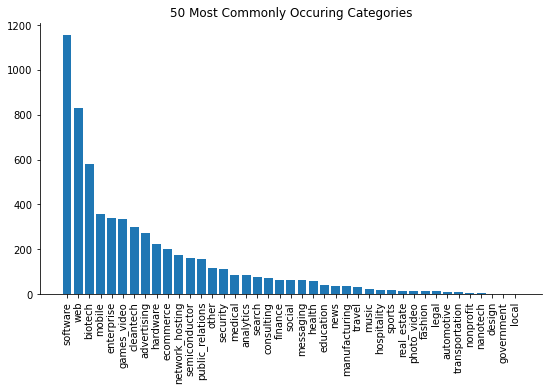

In [113]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Create list of category lists
categories = list(nonoperating_companies.cat_list)
# Flatten the list
flat_categories = [cat for sublist in categories for cat in sublist]
# Count occurences of each
category_counts = Counter(flat_categories).most_common()
# Look at the distribution
plt.figure(figsize=(9, 5))
plt.bar([x[0] for x in category_counts[0:50]],
        [x[1] for x in category_counts[0:50]],
        width=0.8)
plt.xticks(rotation=90)
plt.title('50 Most Commonly Occuring Categories')
sns.despine()

### Feature: Catogries


In [116]:
#fill misiing values
nonoperating_companies.country_code.fillna('unknown', inplace=True)

Text(0.5, 1.0, 'Distribution of Top 10 States')

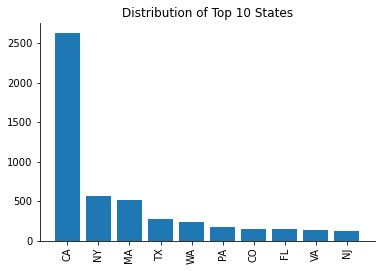

In [118]:
# Look at distribution
country_dist = nonoperating_companies.groupby(
    'state_code').size().sort_values(ascending=False)
plt.bar(country_dist[0:10].index, height=country_dist[0:10].values)
plt.xticks(rotation=90)
sns.despine()
plt.title('Distribution of Top 10 States')

# --------------------------------------

In [114]:
acquisitions.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'acquirer_permalink', 'acquirer_name',
       'acquirer_category_code', 'acquirer_country_code',
       'acquirer_state_code', 'acquirer_region', 'acquirer_city',
       'acquired_at', 'acquired_month', 'acquired_quarter', 'acquired_year',
       'price_amount', 'price_currency_code'],
      dtype='object')

In [115]:
investments.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'investor_permalink', 'investor_name',
       'investor_category_code', 'investor_country_code',
       'investor_state_code', 'investor_region', 'investor_city',
       'funding_round_type', 'funded_at', 'funded_month', 'funded_quarter',
       'funded_year', 'raised_amount_usd'],
      dtype='object')

In [ ]:
companies['state_code'].unique()

In [ ]:
len(companies['state_code'].unique())

In [ ]:

acquisitions['company_state_code'].unique()

In [ ]:
len(acquisitions['company_state_code'].unique())

In [ ]:
companies['permalink'][500:520]

In [ ]:
companies['name'][500:520]

In [120]:
nonoperating_companies.to_csv('companies.csv')